Import library

In [40]:
import sqlite3 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
db_path = "/Users/shangweisong/Desktop/AIAP_Student_score/data/score.db"

conn = sqlite3.connect(db_path)
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

print("Tables in the database:", tables)

# Load a specific table into a DataFrame

df = pd.read_sql_query("SELECT * FROM score;", conn)  # replace with your table name

# Preview the data
print(df.head())
conn.close

Tables in the database:     name
0  score
   index  number_of_siblings direct_admission     CCA learning_style  \
0      0                   0              Yes  Sports         Visual   
1      1                   2               No  Sports       Auditory   
2      2                   0              Yes    None         Visual   
3      3                   1               No   Clubs       Auditory   
4      4                   0               No  Sports       Auditory   

  student_id  gender tuition  final_test  n_male  n_female   age  \
0     ACN2BE  Female      No        69.0    14.0       2.0  16.0   
1     FGXIIZ  Female      No        47.0     4.0      19.0  16.0   
2     B9AI9F    Male      No        85.0    14.0       2.0  15.0   
3     FEVM1T  Female     Yes        64.0     2.0      20.0  15.0   
4     AXZN2E    Male      No        66.0    24.0       3.0  16.0   

   hours_per_week  attendance_rate sleep_time wake_time  mode_of_transport  \
0            10.0             91.0    

<function Connection.close()>

QUICK LOOK AT DATA WITH DATA WRANGLER

In [3]:
df.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


In [ ]:
# Remove duplicate data
# # observe if the duplicates are small
# duplicates = df[df.duplicated(subset='student_id', keep=False)]

# print("\nTable of Duplicate Rows Based on 'student_id':")
# print(duplicates)

df_distinct= df.drop_duplicates(subset='student_id', keep = 'first')
print(df_distinct)

In [ ]:
#  observe the number of missing data in each column
missing_values = df_distinct.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

In [ ]:
# drop null cells and lowercase string values
df_cleaned= df_distinct.dropna().applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_cleaned['tuition'] = df_cleaned['tuition'].replace({'y': 'yes', 'n': 'no'})
df_cleaned
print (df_cleaned)

       index  number_of_siblings direct_admission     CCA learning_style  \
0          0                   0              yes  sports         visual   
1          1                   2               no  sports       auditory   
2          2                   0              yes    none         visual   
4          4                   0               no  sports       auditory   
5          5                   0               no    arts         visual   
...      ...                 ...              ...     ...            ...   
15895  15895                   1               no   clubs         visual   
15896  15896                   1              yes    none       auditory   
15897  15897                   1              yes  sports       auditory   
15898  15898                   1               no   clubs         visual   
15899  15899                   2              yes    none         visual   

      student_id  gender tuition  final_test  n_male  n_female   age  \
0         acn2b

/var/folders/0d/12spm1y90s559_tdr7d3w0500000gn/T/ipykernel_39139/43128270.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned= df_distinct.dropna().applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [19]:
df_cleaned.head(0)

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color


Finding sleep duration

In [ ]:
# Convert 'sleeptime' and 'waketime' to datetime (using a fixed date to avoid errors)
df_cleaned['sleep_time'] = pd.to_datetime(df_cleaned['sleep_time'], format='%H:%M')
df_cleaned['wake_time'] = pd.to_datetime(df_cleaned['wake_time'], format='%H:%M')

# Adjust wake_time if it's earlier than sleep_time
df_cleaned['wake_time'] = df_cleaned.apply(
    lambda row: row['wake_time'] + pd.Timedelta(days=1) if row['wake_time'] < row['sleep_time'] else row['wake_time'], axis=1
)

# Calculate the difference between wake time and sleep time
df_cleaned['sleep_duration'] = df_cleaned['wake_time'] - df_cleaned['sleep_time']
df_cleaned['sleep_duration_hours'] = df_cleaned['sleep_duration'].dt.total_seconds() / 3600
# Display the DataFrame with sleep duration
print(df_cleaned)


In [49]:
df_processed = df_cleaned.drop(['sleep_duration','index','sleep_time','wake_time','sleep_duration'], axis= 1)
df_processed.head(0)

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,bag_color,sleep_duration_hours


Visualise Distribution if not using data wrangler

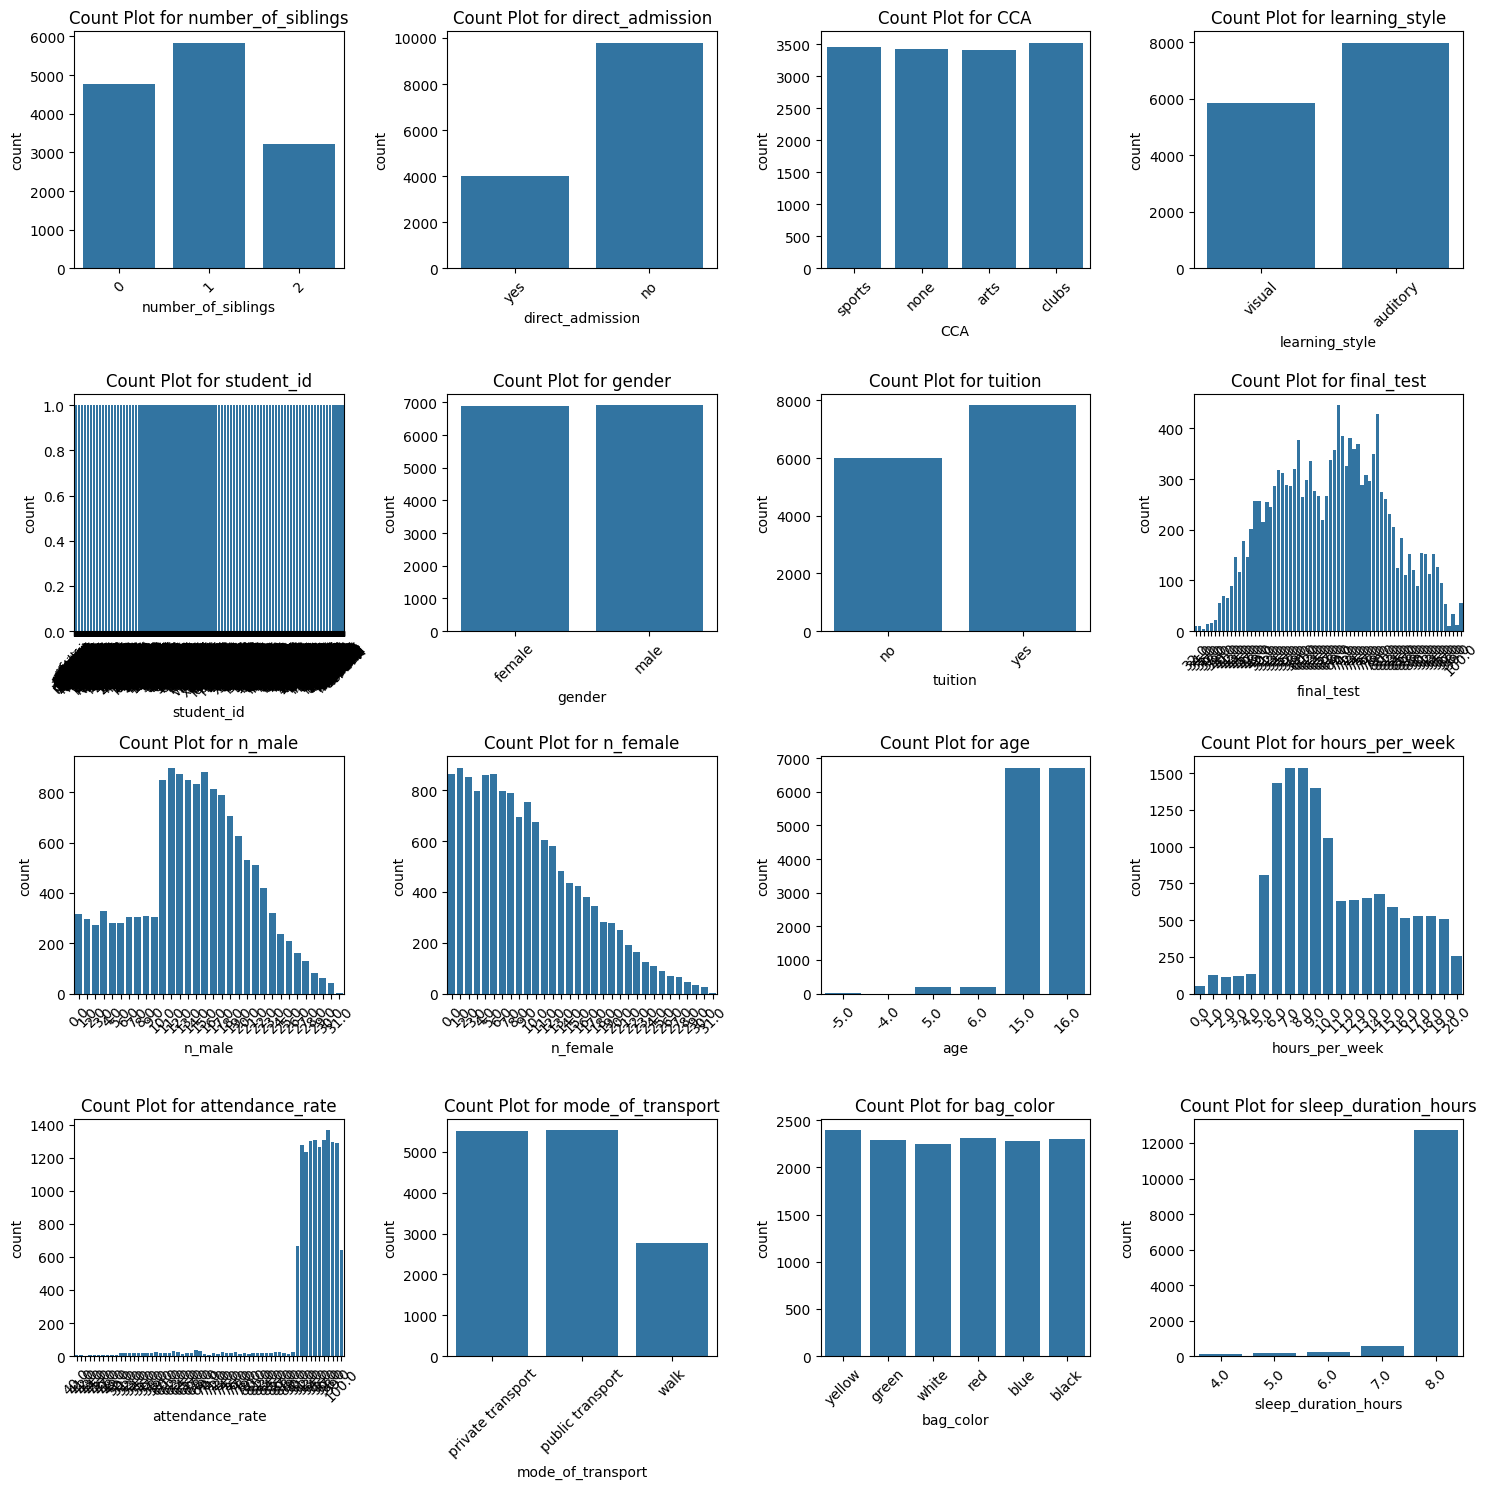

In [51]:
import matplotlib.pyplot as plt

columns_to_plot = df_processed.columns[:16]

# Create a 4x4 grid of subplots (16 total)
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a countplot for each selected column
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df_processed, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [4]:
print(df.info())       # Data types and non-null counts
print(df.describe())   # Summary statistics for numerical columns
print(df.columns)      # List of column names
print(df.dtypes)       # Data types of each column
print(df.isnull().sum())  # Count of missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               15900 non-null  int64  
 1   number_of_siblings  15900 non-null  int64  
 2   direct_admission    15900 non-null  object 
 3   CCA                 15900 non-null  object 
 4   learning_style      15900 non-null  object 
 5   student_id          15900 non-null  object 
 6   gender              15900 non-null  object 
 7   tuition             15900 non-null  object 
 8   final_test          15405 non-null  float64
 9   n_male              15900 non-null  float64
 10  n_female            15900 non-null  float64
 11  age                 15900 non-null  float64
 12  hours_per_week      15900 non-null  float64
 13  attendance_rate     15122 non-null  float64
 14  sleep_time          15900 non-null  object 
 15  wake_time           15900 non-null  object 
 16  mode

In [ ]:

# # Histogram of a specific numeric column
# df['column_name'].hist()
# plt.show()

# # Pairplot for numerical features
# sns.pairplot(df)
# plt.show()